In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
books = pd.read_csv('books.csv')

C:\Users\dell\AppData\Local\Temp\ipykernel_7468\1848672579.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('books.csv')


In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [3]:
ratings = pd.read_csv('ratings.csv')

In [4]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
ratings['User-ID'].nunique()

105283

In [7]:
ratings.shape[0]

1149780

In [6]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [7]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [8]:
books = books.dropna(axis=0)

In [9]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [10]:
books = books.drop(['Year-Of-Publication','Publisher','Image-URL-M','Image-URL-S'],axis=1)

In [11]:
books['Image-URL'] = books['Image-URL-L']

In [12]:
books = books.drop('Image-URL-L',axis=1)

In [13]:
books.head()

,ISBN,Book-Title,Book-Author,Image-URL
0,0195153448,Classical Mythology,Mark P. O. Morford,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,http://images.amazon.com/images/P/0393045218.0...


In [14]:
books['Book-Author'].nunique()

102019

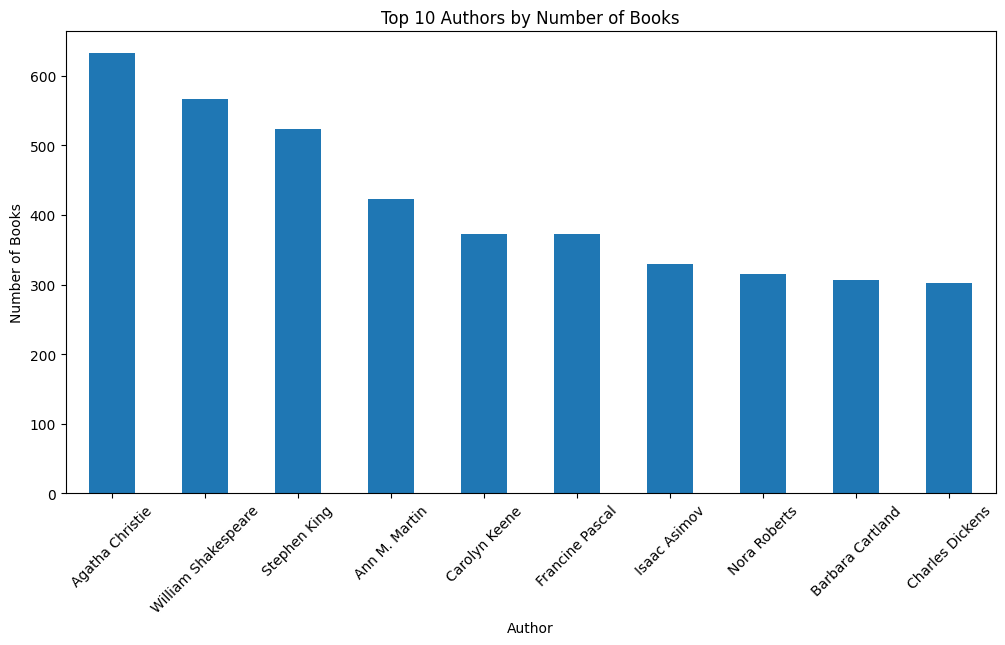

In [23]:
def top_authors(n):
    author_has_books = books.groupby('Book-Author')['Book-Title'].count()
    sorted_authors = author_has_books.sort_values(ascending=False)
    return sorted_authors.head(n)

n = 10
plt.figure(figsize=(12, 6))
top_authors(n).plot(kind='bar')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.title(f'Top {n} Authors by Number of Books')
plt.xticks(rotation=45)
plt.show()

In [17]:
users = pd.read_csv('users.csv')
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [18]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [19]:
users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [20]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [21]:
ratings['Book-Rating'].describe()

count    1.149780e+06
mean     2.866950e+00
std      3.854184e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      1.000000e+01
Name: Book-Rating, dtype: float64

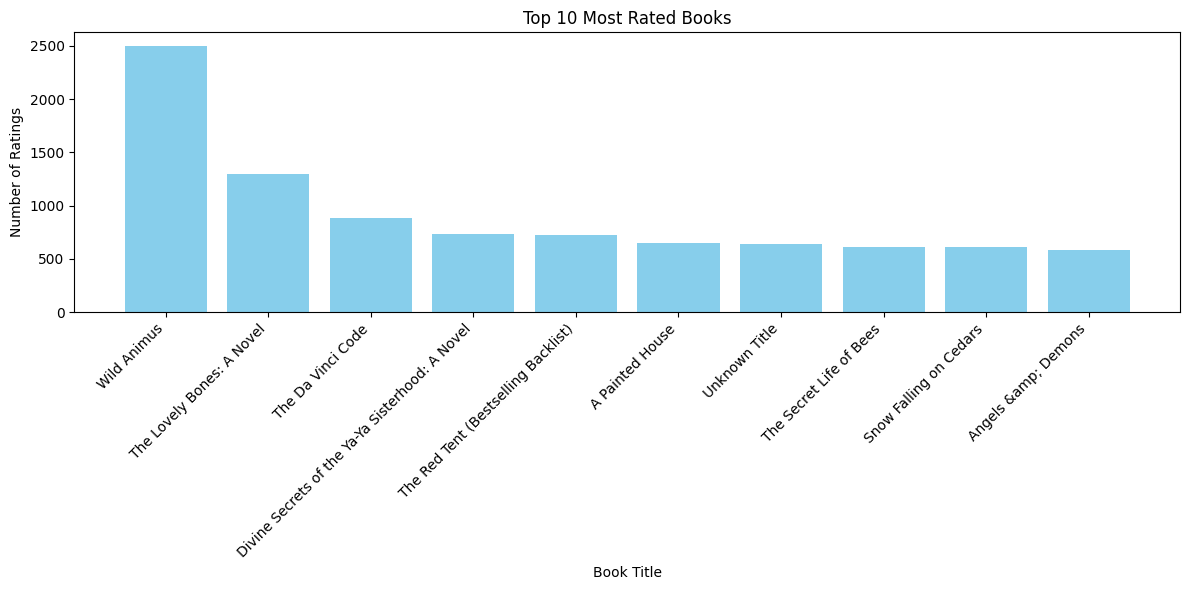

In [25]:
# Most rated Books
def most_rated_books(n):
    books_rated_count = ratings.groupby('ISBN')['Book-Rating'].count()
    sorted_books = books_rated_count.sort_values(ascending=False)
    most_n_books_rated = sorted_books.head(n)
    book_names = []
    for isbn in most_n_books_rated.index:
         if isbn in books["ISBN"].values:
             book_names.append(books.loc[books['ISBN'] == isbn, 'Book-Title'].iloc[0])
         else:
             book_names.append("Unknown Title")
    return book_names,most_n_books_rated
n = 10
plt.figure(figsize=(12, 6))
plt.bar(most_rated_books(n)[0], most_rated_books(n)[1].values, color='skyblue')
plt.xlabel('Book Title')
plt.ylabel('Number of Ratings')
plt.title(f'Top {n} Most Rated Books')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

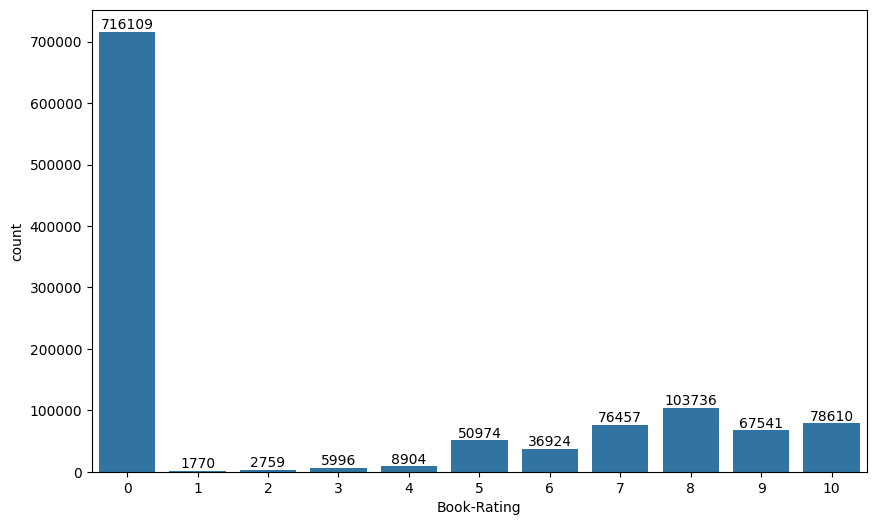

In [27]:
plt.figure(figsize=(10,6))
ax = sns.countplot(ratings,x=ratings['Book-Rating'])
for i in ax.containers:
    ax.bar_label(i)

In [28]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
